In [18]:
# import the dependencies
from load_ardis_mnist import load_ardis_mnist
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

In [19]:
# load the data
(train_images, train_labels), (test_images,
                               test_labels) = load_ardis_mnist()

In [20]:
# normalize and make the black and white values between -0.5 and 0.5
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

In [21]:
# flatten the image into an array
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [22]:
# creating the model 
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=9)

In [23]:
#training
dtree.fit(train_images , train_labels) 

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [24]:
#Test the model accuracy
dtree.score(test_images ,test_labels)

0.8230909090909091

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.191355 to fit



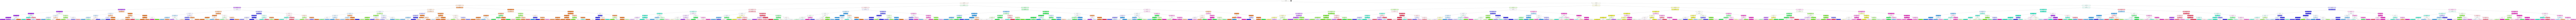

In [25]:
from io import StringIO
import pydotplus
from IPython.display import Image  
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =None ,class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
#The decision tree dosn't have the save att so we can save the model into a pickle 
import pickle
digit_recongnition_DT = pickle.dumps(dtree)

In [27]:
clf2 = pickle.loads(digit_recongnition_DT)

In [28]:
clf2.score(test_images, test_labels)

0.8230909090909091

In [29]:
#or into a joblib file 
from joblib import dump, load
dump(dtree, 'digit_recongnition_DT.joblib')
clf = load('digit_recongnition_DT.joblib')
clf.score(test_images, test_labels)

0.8230909090909091